In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale

Loading training and testing data

In [2]:
x_train= pd.read_csv("Data/x_train.csv")
x_test= pd.read_csv("Data/x_test.csv")
y_train= pd.read_csv("Data/y_train.csv")
y_test= pd.read_csv("Data/y_test.csv")

In [3]:
# creating algorithm instance
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [4]:
# training base model 
xtrain = x_train.iloc[:, 0:12]
model = tree.fit(xtrain, y_train)

In [5]:
# Prediction with training data to check training accuracy
predict = model.predict(xtrain)
accuracy_score(predict, y_train)

1.0

In [6]:
confusion_matrix(y_train, predict)

array([[6617,    0,    0,    0,    0],
       [   0, 6617,    0,    0,    0],
       [   0,    0, 6617,    0,    0],
       [   0,    0,    0, 6617,    0],
       [   0,    0,    0,    0, 6617]])

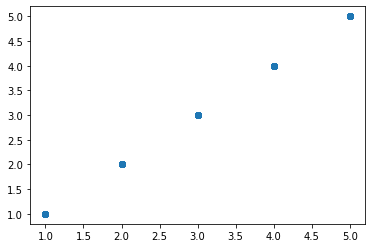

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_train, predict)

In [8]:
# Prediction with test data
xtest= x_test.iloc[:, 0:12]
pred = model.predict(xtest)

In [9]:
accuracy_score(pred, y_test)

0.6885953087085468

In [10]:
confusion_matrix(y_test, pred)

array([[ 785,  302,   37,    6,    0],
       [ 328, 1212,    8,   57,    7],
       [  32,    7,  451,  103,   32],
       [   4,   43,   68,   39,   37],
       [   0,    2,   28,   54,   67]])

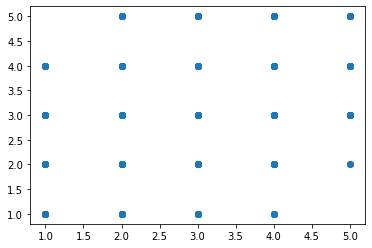

In [11]:
plt.scatter(y_test, pred)

<font color="blue"> The conclusion is that the base model suffers from overfiting because the training accuracy was perfect and had difficulties with test data </font>

<font color="green"> Tuning hiper-parameters com gridsearchCV</font>

In [12]:
parameters= {"criterion":["gini", "entropy"],
             "max_depth":list(range(2, 11))}

In [13]:
# creating algorithm instance
grid= GridSearchCV(tree, parameters, cv= 5, n_jobs= 4, scoring= "accuracy", refit= True)

In [14]:
model2= grid.fit(xtrain, y_train)

In [15]:
model2.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [16]:
model2.best_score_

0.7579870031736436

In [18]:
table= pd.DataFrame(model2.cv_results_)
result= table[["param_criterion", "param_max_depth", "mean_test_score",
              "std_test_score", "rank_test_score" ]]     
result

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,2,0.639323,0.003972,18
1,gini,3,0.661780,0.007672,16
2,gini,4,0.691068,0.009264,13
3,gini,5,0.699955,0.009329,11
4,gini,6,0.708841,0.010807,10
5,gini,7,0.720840,0.013073,7
6,gini,8,0.729998,0.011279,5
7,gini,9,0.743086,0.014007,3
8,gini,10,0.757987,0.012030,1
9,entropy,2,0.639414,0.003872,17


In [19]:
# Prediction with training data to check training accuracy
predict2 = model2.predict(xtrain)
accuracy_score(y_train, predict2)

0.7960405017379477

In [21]:
# Prediction with data test
pred2 = model2.predict(xtest)
accuracy_score(y_test, pred2)

0.7198705850633594

In [23]:
confusion_matrix(y_test, pred2)

array([[ 809,  271,   48,    2,    0],
       [ 225, 1238,   10,  133,    6],
       [   3,    0,  475,  110,   37],
       [   0,   33,   53,   72,   33],
       [   0,    1,   17,   57,   76]])

In [14]:
parameters2= {"criterion":["gini", "entropy"],
              "max_depth":list(range(4, 13)), 
              "min_samples_split":list(range(2, 6)), 
              "min_samples_leaf":list(range(2, 6))}

In [15]:
grid2 = GridSearchCV(tree, parameters2, cv=5, refit= True, scoring= "accuracy")

In [26]:
model3= grid2.fit(xtrain, y_train)

In [27]:
model3.best_score_

0.7804443101103219

In [28]:
model3.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [29]:
table2= pd.DataFrame(model3.cv_results_)
result2= table2[["param_criterion", "param_max_depth", "param_min_samples_leaf",
                "param_min_samples_split", "mean_test_score",
                "std_test_score", "rank_test_score" ]]     
result2.sort_values(by= ["rank_test_score"])

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,rank_test_score
128,gini,12,2,2,0.780444,0.015629,1
135,gini,12,3,5,0.780384,0.013583,2
130,gini,12,2,4,0.780323,0.014575,3
129,gini,12,2,3,0.780293,0.014666,4
132,gini,12,3,2,0.780263,0.013456,5
...,...,...,...,...,...,...,...
154,entropy,4,4,4,0.686595,0.007266,273
155,entropy,4,4,5,0.686595,0.007266,273
156,entropy,4,5,2,0.686595,0.007266,273
149,entropy,4,3,3,0.686595,0.007266,273


In [30]:
predict3 = model3.predict(xtrain)
accuracy_score(y_train, predict3)

0.8414689436300439

In [31]:
pred3= model3.predict(xtest)

In [32]:
accuracy_score(y_test, pred3)

0.7190617417093557

Loading standardized training and testing data

In [33]:
x_train_norm= pd.read_csv("Data/x_train_norm.csv")
x_test_norm= pd.read_csv("Data/x_test_norm.csv")

In [34]:
x_train_norm

,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_FM,DISAPPROVALS_OM,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES
0,-0.250308,-0.250198,-0.293156,-0.293808,-0.212294,-0.877855,-0.551592,-0.135847,0.800015,-0.557012,-0.886794,1.512318
1,-0.250308,-0.250198,-0.293156,-0.293808,-0.313401,-0.251804,-0.631016,-0.292352,0.800015,-1.117204,-0.886794,1.512318
2,1.917495,1.927500,-0.293156,-0.293808,-3.144408,-2.996797,-0.273605,-0.448858,0.800015,-0.930473,1.180295,1.512318
3,1.917495,1.927500,1.631678,1.701063,-3.144408,-2.996797,-2.497497,-2.952943,-1.385902,-1.117204,-1.920339,-0.330399
4,-0.250308,-0.250198,-0.293156,-0.293808,0.444904,0.470562,0.004381,0.698848,-1.385902,-0.743743,1.180295,-0.330399
...,...,...,...,...,...,...,...,...,...,...,...,...
33080,-0.250308,-0.250198,-0.293156,-0.293808,0.784377,0.655919,-0.341944,0.714010,0.177260,-0.503813,1.180295,-0.330399
33081,-0.250308,-0.250198,-0.293156,-0.293808,0.863443,1.192929,1.276570,-0.135847,-0.597996,1.377602,1.180295,-0.944638
33082,-0.250308,-0.250198,-0.293156,-0.293808,0.494578,0.423242,0.878399,0.491536,-1.385902,1.683757,0.663522,-0.536926
33083,-0.250308,-0.250198,-0.293156,-0.293808,0.882537,0.907402,1.056171,1.236893,0.800015,-0.292937,-0.672747,-0.944638


In [35]:
x_test_norm

,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_FM,DISAPPROVALS_OM,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES
0,-0.250308,-0.250198,-0.293156,-0.293808,-0.262848,-0.059173,-0.591304,-0.396689,0.800015,-0.743743,-0.886794,-0.330399
1,-0.250308,-0.250198,-0.293156,-0.293808,0.394350,0.037142,0.361792,-0.396689,-1.385902,0.750103,0.146750,-0.944638
2,-0.250308,-0.250198,-0.293156,-0.293808,0.849333,0.855824,0.798628,-0.135847,0.800015,0.003180,0.663522,-0.330399
3,-0.250308,-0.250198,-0.293156,-0.293808,0.091028,-0.059173,-0.591304,0.072827,0.800015,-0.930473,-0.886794,0.283840
4,-0.250308,-0.250198,-0.293156,-0.293808,0.242689,0.181616,-0.114756,-0.135847,0.800015,-0.930473,-0.370022,-0.330399
...,...,...,...,...,...,...,...,...,...,...,...,...
3704,-0.250308,-0.250198,-0.293156,-0.293808,-0.414509,-0.637066,-0.114756,0.385837,0.800015,-0.557012,0.663522,-0.330399
3705,-0.250308,-0.250198,-0.293156,-0.293808,-0.717831,-0.251804,-0.194180,-0.553194,0.800015,-0.557012,0.663522,-0.944638
3706,-0.250308,-0.250198,-0.293156,-0.293808,0.343797,-0.396278,0.600067,-0.135847,0.800015,1.497026,-1.920339,-0.330399
3707,-0.250308,-0.250198,-0.293156,-0.293808,0.546011,0.326089,0.679491,0.490174,0.800015,0.563373,1.180295,-0.330399


In [42]:
model4 = tree.fit(x_train_norm, y_train)

In [43]:
predict4= model_norm.predict(x_train_norm)
accuracy_score(y_train, predict_n)

1.0

In [44]:
pred4= model4.predict(x_test_norm)
accuracy_score(y_test, pred_norm)

0.6931787543812349

In [45]:
model5= grid.fit(x_train_norm, y_train)

In [46]:
model5.best_score_

0.7580776787063623

In [47]:
model5.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [48]:
grid_norm= pd.DataFrame(model2_norm.cv_results_)
result= grid_norm[["param_criterion", "param_max_depth", "mean_test_score",
              "std_test_score", "rank_test_score" ]]     
result

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,2,0.639323,0.003972,18
1,gini,3,0.661780,0.007672,16
2,gini,4,0.691068,0.009264,13
3,gini,5,0.699955,0.009329,11
4,gini,6,0.708841,0.010807,10
5,gini,7,0.720750,0.013193,7
6,gini,8,0.730089,0.011515,5
7,gini,9,0.743267,0.014171,3
8,gini,10,0.758078,0.011882,1
9,entropy,2,0.639383,0.003861,17


In [49]:
pred5= model2_norm.predict(x_test_norm)
accuracy_score(y_test, pred2_norm)

0.7217578862227015

In [50]:
model6= grid2.fit(x_train_norm, y_train)

In [51]:
model6.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [52]:
model6.best_score_

0.7811092640169262

In [53]:
pred6= model3_norm.predict(x_test_norm)
accuracy_score(y_test, pred3_norm)

0.7198705850633594

<font color="red"> Loading pca training and testing data</font>

In [65]:
x_trainpca= pd.read_csv("Data/xtrain_pca.csv")
x_testpca= pd.read_csv("Data/xtest_pca.csv")

In [66]:
x_trainpca

,0,1,2,3,PROFILE_N
0,-1.575681,-2.435701,-1.940061,0.124467,2.0
1,1.835935,-2.920650,2.098848,-0.757466,3.0
2,-7.857390,7.418531,-1.736708,-0.448283,1.0
3,-7.630789,7.843443,0.637897,-0.460358,1.0
4,2.249076,-3.057006,0.920320,-0.142734,3.0
...,...,...,...,...,...
32710,9.946353,0.650680,0.830226,-1.085142,5.0
32711,4.734239,-1.910591,-1.265020,0.623513,5.0
32712,12.490218,4.574944,-0.440892,-0.435939,5.0
32713,12.932957,3.946119,-1.609262,-0.648761,5.0


In [67]:
xpca= x_testpca.drop(["PROFILE_N"], axis= 1)
ypca= x_testpca.PROFILE_N 

In [68]:
xpca

,0,1,2,3
0,-1.388728,-1.965118,0.436214,-0.104563
1,0.375220,-4.352072,-2.525721,0.259981
2,1.984599,1.056485,2.784133,0.639217
3,10.009216,4.140566,-0.213733,-0.559644
4,0.425236,-2.037004,-0.592006,0.387378
...,...,...,...,...
3704,2.563085,-2.347213,-1.841070,-1.330054
3705,-0.479269,-1.592704,1.132477,0.184089
3706,11.076587,3.654155,-2.052433,-0.324103
3707,1.777712,-3.647713,-0.128878,0.042614


In [69]:
ypca

0       1.0
1       4.0
2       2.0
3       3.0
4       2.0
       ... 
3704    3.0
3705    2.0
3706    4.0
3707    3.0
3708    4.0
Name: PROFILE_N, Length: 3709, dtype: float64

In [70]:
x= x_trainpca.iloc[:, 0:4]
y= x_trainpca.PROFILE_N

In [71]:
model7= tree.fit(x, y)

In [72]:
predict_pca= model7.predict(x)
accuracy_score(y, predict_pca)

1.0

In [74]:
pred_pca= model7.predict(xpca)
accuracy_score(ypca, pred_pca)

0.6044755998921543

In [79]:
model8= grid.fit(x, y)

In [80]:
model8.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [81]:
model8.best_score_

0.6893168271435122

In [83]:
pred8= model2_pca.predict(xpca)
accuracy_score(ypca, pred2_pca)

0.6317066594769479

In [84]:
model9= grid2.fit(x, y)

In [85]:
model9.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [86]:
model9.best_score_

0.7186611646033929

In [88]:
pred9= model3_pca.predict(xpca)
accuracy_score(ypca, pred3_pca)

0.6400647074683203

<font color="brow">New tests with data from preprocessing2</font>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [17]:
df= pd.read_csv("Data/data3.csv")
df.shape

(18545, 23)

In [18]:
df

,DISAPPROVALS_BL,DISAPPROVALS_EN,DISAPPROVALS_HUMAN,DISAPPROVALS_FM,DISAPPROVALS_OM,DISAPPROVALS_EXACTS,NOTE_BL,NOTE_EN,NOTE_FM,NOTE_OM,...,NOTE_OM_CAT,NOTE_BL_CAT_N,NOTE_EN_CAT_N,NOTE_FM_CAT_N,NOTE_OM_CAT_N,ENGLISH,H_CLASS_PRES,ONLINE_TASKS,ABSENCES,PROFILE_N
0,0.0,0.0,0,0.0,0.0,0,6.2,5.8,4.6,5.9,...,"(4, 6]",8,6,6,6,0.0,2.0,4.0,3.0,2.0
1,0.0,0.0,0,0.0,0.0,0,6.0,6.2,5.2,4.5,...,"(4, 6]",6,8,6,6,1.0,2.0,4.0,3.0,2.0
2,0.0,0.0,0,0.0,0.0,0,7.3,6.7,7.1,7.2,...,"(6, 8]",8,8,8,8,0.0,5.0,0.0,3.0,3.0
3,1.0,3.0,1,1.0,1.0,1,0.0,0.0,0.0,0.0,...,"(-1, 2]",2,2,2,2,1.0,4.0,4.0,4.0,1.0
4,1.0,3.0,1,1.0,1.0,1,0.0,0.0,0.0,0.0,...,"(-1, 2]",2,2,2,2,1.0,5.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18540,1.0,1.0,1,1.0,1.0,1,0.0,0.0,0.0,0.0,...,"(-1, 2]",2,2,2,2,1.0,20.0,4.0,4.0,1.0
18541,0.0,0.0,0,0.0,0.0,0,7.0,7.9,5.8,7.0,...,"(6, 8]",8,8,6,8,1.0,9.0,5.0,6.0,2.0
18542,0.0,0.0,0,0.0,0.0,0,7.9,7.6,8.3,7.2,...,"(6, 8]",8,8,10,8,1.0,8.0,3.0,1.0,5.0
18543,0.0,0.0,0,1.0,1.0,1,6.3,5.1,0.0,0.0,...,"(-1, 2]",8,6,2,2,1.0,3.0,2.0,6.0,1.0


In [19]:
# Removing categorical variables and create new dataframe 
df1 = df.drop(['NOTE_BL_CAT', 'NOTE_EN_CAT', 'NOTE_FM_CAT', 'NOTE_OM_CAT'], axis= 1)
df1.shape

(18545, 19)

In [20]:
x = df1.iloc[:, 0:18]
y = df1.PROFILE_N

In [21]:
x.dtypes

DISAPPROVALS_BL        float64
DISAPPROVALS_EN        float64
DISAPPROVALS_HUMAN       int64
DISAPPROVALS_FM        float64
DISAPPROVALS_OM        float64
DISAPPROVALS_EXACTS      int64
NOTE_BL                float64
NOTE_EN                float64
NOTE_FM                float64
NOTE_OM                float64
NOTE_BL_CAT_N            int64
NOTE_EN_CAT_N            int64
NOTE_FM_CAT_N            int64
NOTE_OM_CAT_N            int64
ENGLISH                float64
H_CLASS_PRES           float64
ONLINE_TASKS           float64
ABSENCES               float64
dtype: object

In [22]:
y.shape

(18545,)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

In [96]:
x_train.shape

(14836, 18)

In [97]:
y_train.shape

(14836,)

In [67]:
# x_train = pd.DataFrame(x_train)
# x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
12097,1.486801,1.490230,2.748448,1.226414,1.252298,2.306202,-2.582756,-2.499051,-2.090063,0.201204,-2.425672,-2.332441,-1.947328,-0.003114,0.654191,1.156439,-0.628955,-0.013615
11189,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.380493,0.526630,0.137098,0.151421,0.661845,0.757284,-0.107681,-0.003114,0.654191,-0.282643,-0.628955,1.180174
10351,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.241590,0.434942,0.380061,0.798589,0.661845,0.757284,0.812143,1.151707,0.654191,-0.042796,-1.164786,-0.013615
11399,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.334192,-0.069338,0.137098,0.002075,0.661845,-0.272624,-0.107681,-0.003114,0.654191,-1.242031,0.978538,-0.610509
2216,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.611997,0.801692,0.663518,0.201204,0.661845,0.757284,0.812143,-0.003114,-1.528605,1.636133,0.978538,-0.610509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.102688,-0.115181,-0.105865,0.051857,-0.367328,-0.272624,-0.107681,-0.003114,0.654191,-1.002184,-1.700617,1.180174
11964,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.704598,0.618317,1.189938,0.201204,0.661845,0.757284,1.731967,-0.003114,-1.528605,0.436898,0.978538,-1.207403
5390,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.102688,0.251568,0.218086,-0.296618,-0.367328,-0.272624,-0.107681,-0.003114,-1.528605,-0.522490,-0.628955,0.583279
860,-0.310053,-0.310064,-0.363842,-0.367185,-0.367444,-0.433613,0.334192,0.572473,-0.065371,0.450114,0.661845,0.757284,-0.107681,-0.003114,0.654191,-0.042796,0.442707,-1.804298


In [98]:
balanced = SMOTE(random_state = 42)
x_train, y_train = balanced.fit_resample(x_train, y_train)

In [99]:
x_train.shape

(32790, 18)

In [100]:
y_train.shape

(32790,)

In [101]:
aUnique = y_train
unique, counts = np.unique(aUnique, return_counts=True)
print(dict(zip(unique, counts)))  

{1.0: 6558, 2.0: 6558, 3.0: 6558, 4.0: 6558, 5.0: 6558}


In [102]:
pipe = Pipeline([("scaler", StandardScaler()),("tree", DecisionTreeClassifier())])
model10= pipe.fit(x_train, y_train)

In [103]:
pred10= model10.predict(x_train)

In [104]:
accuracy_score(y_train, pred)

1.0

In [105]:
confusion_matrix(pred, y_train)

array([[6558,    0,    0,    0,    0],
       [   0, 6558,    0,    0,    0],
       [   0,    0, 6558,    0,    0],
       [   0,    0,    0, 6558,    0],
       [   0,    0,    0,    0, 6558]])

In [106]:
pred10= model10.predict(x_test)

In [107]:
accuracy_score(y_test, pred10)

0.6837422485845241

In [112]:
tree6= DecisionTreeClassifier()

In [113]:
parameters = [{"criterion":["gini", "entropy"],"max_depth":list(range(2, 11)), 
             "min_samples_split":list(range(2, 6)), "min_samples_leaf":list(range(2, 6))}]

In [114]:
grid2 = GridSearchCV(tree6, 
                     param_grid=parameters, cv= 3, refit= True)

In [115]:
model11= grid2.fit(x_train, y_train)

In [116]:
model11.best_score_

0.7440073193046661

In [117]:
model11.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [118]:
predict11= model11.predict(x_train)
accuracy_score(y_train, predict5)

0.7879231473010064

In [119]:
pred11= model11.predict(x_test)
accuracy_score(y_test, pred5)

0.7481801024534915

In [120]:
scaler= StandardScaler()
x_norm= scaler.fit_transform(x_train)

In [121]:
x_norm.shape

(32790, 18)

In [122]:
model12= grid2.fit(x_norm, y_train)

In [159]:
model12.best_score_

0.7439158279963403

In [123]:
model12.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [124]:
predict12= model12.predict(x_norm)
accuracy_score(y_train,predict12)

0.7878926501982312

In [125]:
test_norm= scaler.transform(x_test)
pred6= model12.predict(test_norm)
accuracy_score(y_test, pred12)

0.7487193313561606

In [126]:
tree7= DecisionTreeClassifier(max_depth= 10)
model13= tree7.fit(x_norm, y_train)

In [127]:
predict13= model13.predict(x_norm)
accuracy_score(y_train, predict13)

0.7908203720646538

In [128]:
pred13= model13.predict(test_norm)
accuracy_score(y_test, pred13)

0.7471016446481531

In [23]:
# Loading CSV file with feature selection
selection= pd.read_csv("Data/selection_variables.csv")
selection

,0,1,2,3,4,5,6,7,8,9,TARGET
0,0.0,0.0,0.0,0.0,0.0,6.2,5.8,4.6,6.0,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,6.0,6.2,5.2,6.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,7.3,6.7,7.1,8.0,5.0,3.0
3,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,4.0,1.0
4,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18540,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,20.0,1.0
18541,0.0,0.0,0.0,0.0,0.0,7.0,7.9,5.8,6.0,9.0,2.0
18542,0.0,0.0,0.0,0.0,0.0,7.9,7.6,8.3,10.0,8.0,5.0
18543,0.0,0.0,1.0,1.0,1.0,6.3,5.1,0.0,2.0,3.0,1.0


In [24]:
x= selection.iloc[:, 0:10]
y= selection.TARGET

In [25]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.2, random_state=42)

In [26]:
smote = SMOTE(random_state= 42)
xtrain, ytrain= smote.fit_resample(xtrain, ytrain)

In [17]:
model14= tree.fit(xtrain, ytrain) 

In [19]:
predict14= model14.predict(xtrain)
accuracy_score(ytrain, predict14)

0.9946020128087831

In [21]:
pred14= model14.predict(xtest)
accuracy_score(ytest, pred14)

0.702345645726611

In [28]:
xtrain= xtrain.to_numpy()
xtrain

array([[ 1.        ,  1.        ,  1.        , ...,  0.        ,
         2.        , 10.        ],
       [ 0.        ,  0.        ,  0.        , ...,  5.5       ,
         6.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        , ...,  6.1       ,
         8.        ,  5.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  7.67776765,
         8.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        , ...,  8.74893543,
        10.        ,  5.        ],
       [ 0.        ,  0.        ,  0.        , ...,  7.33455828,
         8.        , 16.05759714]])

In [33]:
model15= grid.fit(xtrain, ytrain)

In [34]:
model15.best_score_

0.7390972857578529

In [35]:
model15.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [36]:
predict15= model15.predict(xtrain)
accuracy_score(ytrain, predict15)

0.7770661787130223

In [37]:
pred15= model15.predict(xtest)
accuracy_score(ytest, pred15)

0.7584254516042059

In [27]:
model16= grid2.fit(xtrain, ytrain)

In [28]:
model16.best_score_

0.7576395242451966

In [29]:
model16.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [30]:
predict16= model16.predict(xtrain)
accuracy_score(ytrain, predict16)

0.8182982616651419

In [32]:
pred16= model16.predict(xtest)
accuracy_score(ytest, pred16)

0.7508762469668374

In [39]:
# Standardize data
scaler= StandardScaler()
xtrain_norm= scaler.fit_transform(xtrain)
xtest_norm= scaler.transform(xtest)

In [42]:
model17= grid.fit(xtrain_norm, ytrain)

In [43]:
model17.best_score_

0.7393717596828302

In [45]:
model17.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [49]:
predict17= model17.predict(xtrain_norm)
accuracy_score(ytrain, predict17)

0.7770661787130223

In [51]:
pred17= model17.predict(xtest_norm)
accuracy_score(ytest, pred17)

0.7578862227015368

In [81]:
parameters3= {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 11, 12, 13, 14],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [2, 3, 4, 5]}

In [82]:
grid3= GridSearchCV(tree, parameters3, cv=5, refit= True, scoring= "accuracy")
model18= grid3.fit(xtrain_norm, ytrain)

In [83]:
model18.best_score_

0.7703263189996952

In [84]:
model18.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [85]:
predict18= model18.predict(xtrain_norm)
accuracy_score(ytrain, predict18)

0.8561756633119854

In [86]:
pred18= model18.predict(xtest_norm)
accuracy_score(ytest, pred18)

0.7508762469668374